# CSV to DataFrame 

CSV files are loaded into the DataFrame by calling the pd.read_csv .After loading the CSV files which is the Train dataset we print it out so as to see what we are working with.

In [1]:
import pandas as pd
import numpy as np
import hashlib
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [2]:
#Load datasets
directory = 'datasets/depression/Survey/'  
train =pd.read_csv(directory+'depressionTrain.csv') 
train.head()
# print(train)

,GENDER,ZIMBABWEAN,MARITAL_STATUS,AGE,OCCUPATION,CHILDREN,EDU_LEVEL,HOUSEHOLD_SIZE,2_WEEK_SAD,NO_CARE,...,ENJOY_JOB,SALARY_SUSTAIN,DEBT,saved_ecocash,received_ecocash,ent_wagelabor,ent_ownfarm,ent_business,ent_nonagbusiness,ent_employees
0,Female,Yes,Not married,21.0,Student,No,University Level,4.0,Yes,No,...,Yes,No,No,Yes,No,No,No,No,No,No
1,Male,Yes,Married,31.0,Employeed,Yes,University Level,5.0,Yes,Yes,...,No,No,Yes,No,Yes,No,No,No,No,No
2,Male,Yes,Not married,16.0,Student,No,Ordinary Level,4.0,No,No,...,No,No,No,Yes,No,No,No,No,No,No
3,Male,Yes,Not married,22.0,Student,No,University Level,4.0,Yes,Yes,...,Yes,No,No,Yes,No,No,Yes,No,Yes,No
4,Female,Yes,Not married,18.0,Student,No,Advance Level,5.0,Yes,Yes,...,NaN,No,No,No,No,Yes,No,No,No,No


# Visualizing Data

Data visualising is very important for recognising underlying patterns to exploit in the model.

In [3]:
#Description of data
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 771 entries, 0 to 770
Data columns (total 35 columns):
GENDER                  769 non-null object
ZIMBABWEAN              223 non-null object
MARITAL_STATUS          771 non-null object
AGE                     771 non-null float64
OCCUPATION              223 non-null object
CHILDREN                771 non-null object
EDU_LEVEL               758 non-null object
HOUSEHOLD_SIZE          766 non-null float64
 2_WEEK_SAD             771 non-null object
NO_CARE                 771 non-null object
LOST_WEIGHT             771 non-null object
EAT_MORE                771 non-null object
LOST_APPETITE           771 non-null object
TROUBLE _SLEEPING       771 non-null object
TIRED                   721 non-null object
TAKE_DRUGS              764 non-null object
SUICIDE_THOUGHT         758 non-null object
FAILURE_DECISIONS       764 non-null object
BE_ALONE                758 non-null object
FAILURE_FEELING         708 non-null object
DEPRESSED    

In [4]:
train.isnull().sum()

GENDER                    2
ZIMBABWEAN              548
MARITAL_STATUS            0
AGE                       0
OCCUPATION              548
CHILDREN                  0
EDU_LEVEL                13
HOUSEHOLD_SIZE            5
 2_WEEK_SAD               0
NO_CARE                   0
LOST_WEIGHT               0
EAT_MORE                  0
LOST_APPETITE             0
TROUBLE _SLEEPING         0
TIRED                    50
TAKE_DRUGS                7
SUICIDE_THOUGHT          13
FAILURE_DECISIONS         7
BE_ALONE                 13
FAILURE_FEELING          63
DEPRESSED                 0
DEPRESSION_TREATMENT      0
FAMILY_DEPRESSED          6
BORROW_MONEY              0
SAVINGS                   0
ENJOY_JOB                17
SALARY_SUSTAIN            5
DEBT                      5
saved_ecocash             0
received_ecocash          0
ent_wagelabor             0
ent_ownfarm               0
ent_business              0
ent_nonagbusiness         0
ent_employees             2
dtype: int64

In [5]:
train=train.drop(['OCCUPATION','ZIMBABWEAN'],axis=1)

In [6]:
#Frequency Distribution
train[ "DEPRESSED"].value_counts() 


No     664
Yes    107
Name: DEPRESSED, dtype: int64

In [7]:
train.DEPRESSED.describe()

count     771
unique      2
top        No
freq      664
Name: DEPRESSED, dtype: object

In [8]:
train_set = train.replace('Yes', 1).replace('No', 0).replace('Not married',0).replace('Married', 1)

In [9]:
train.describe()

,AGE,HOUSEHOLD_SIZE
count,771.000000,766.000000
mean,34.378599,4.622715
std,13.898105,1.976319
min,16.000000,1.000000
25%,25.000000,3.000000
50%,30.000000,5.000000
75%,41.000000,5.000000
max,91.000000,12.000000


In [10]:
train.describe(include=['O'])

,GENDER,MARITAL_STATUS,CHILDREN,EDU_LEVEL,2_WEEK_SAD,NO_CARE,LOST_WEIGHT,EAT_MORE,LOST_APPETITE,TROUBLE _SLEEPING,...,ENJOY_JOB,SALARY_SUSTAIN,DEBT,saved_ecocash,received_ecocash,ent_wagelabor,ent_ownfarm,ent_business,ent_nonagbusiness,ent_employees
count,769,771,771,758,771,771,771,771,771,771,...,754,766,766,771,771,771,771,771,771,769
unique,2,2,2,3,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,Female,Married,No,University Level,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
freq,595,443,656,670,545,594,558,523,654,485,...,580,592,717,631,722,629,578,687,557,765


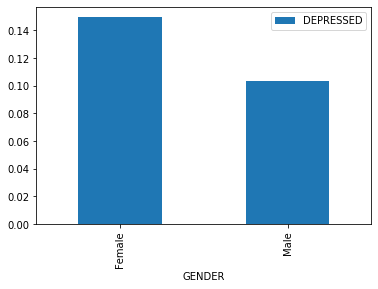

In [11]:
#Explore Gender - Depressed  relationship
gender_pivot = train_set.pivot_table(index="GENDER",values="DEPRESSED")
gender_pivot.plot.bar()

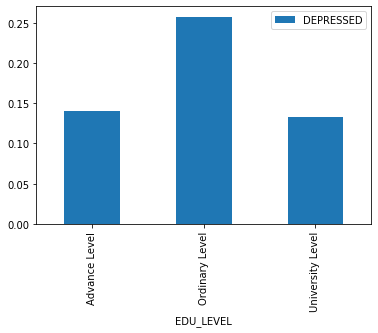

In [12]:
#Explore Education - Depression relationship
education_pivot = train_set.pivot_table(index="EDU_LEVEL",values="DEPRESSED")
education_pivot.plot.bar()

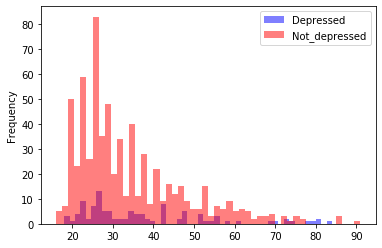

In [13]:
#Explore  numerical Age - Depressed relationship
#compare ages of those who are depressed and those who are not
depressed = train_set[train_set["DEPRESSED"] == 1]
not_depressed  = train_set[train_set["DEPRESSED"] == 0]
depressed["AGE"].plot.hist(alpha=0.5,color='blue',bins=50)
not_depressed["AGE"].plot.hist(alpha=0.5,color='red',bins=50)
plt.legend(['Depressed','Not_depressed'])
plt.show()

# Transforming Features

To avoid overfitting, we decide to group people into logical human age.

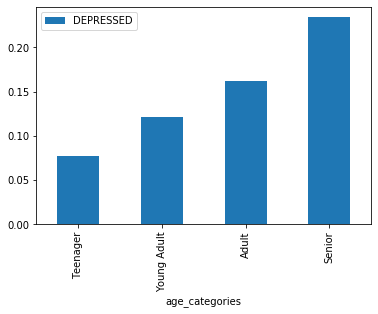

In [14]:
# convert age to a categorical variable
#use pandas.cut() for creating bins
cut_points = [-1,0, 5, 12, 18, 35, 60, 100]
label_names = ["Missing", 'Infant', "Child", 'Teenager', "Young Adult", 'Adult', 'Senior'] 

def process_age(df,cut_points,label_names,attribute):
    df[attribute] = df[attribute].fillna(-0.5)
    df["age_categories"] = pd.cut(df[attribute],cut_points,labels=label_names)
    return df

train_set = process_age(train_set,cut_points,label_names,'AGE')

age_cat_pivot = train_set.pivot_table(index="age_categories",values="DEPRESSED")
age_cat_pivot.plot.bar()
plt.show()


# Normalize Labels

Convert each unique string value into a number, making data more flexible for algorithms. We also fill in the missing data with a Zero for each data is very crucial to use in this model training. 

In [15]:
train_sets = train_set.replace('Male', 0).replace('Female', 1).replace('Student', 1).replace('Employeed', 2).replace('Unemployeed', 3).replace('Self-employeed', 4).replace('University Level', 3).replace('Ordinary Level', 1).replace('Advance Level', 2)

In [16]:
train_data =train_sets.fillna(0)

In [17]:
train_data=train_data.drop('age_categories',axis=1)

In [18]:
train_data.astype(int)

,GENDER,MARITAL_STATUS,AGE,CHILDREN,EDU_LEVEL,HOUSEHOLD_SIZE,2_WEEK_SAD,NO_CARE,LOST_WEIGHT,EAT_MORE,...,ENJOY_JOB,SALARY_SUSTAIN,DEBT,saved_ecocash,received_ecocash,ent_wagelabor,ent_ownfarm,ent_business,ent_nonagbusiness,ent_employees
0,1,0,21,0,3,4,1,0,1,0,...,1,0,0,1,0,0,0,0,0,0
1,0,1,31,1,3,5,1,1,0,1,...,0,0,1,0,1,0,0,0,0,0
2,0,0,16,0,1,4,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,22,0,3,4,1,1,1,0,...,1,0,0,1,0,0,1,0,1,0
4,1,0,18,0,2,5,1,1,0,1,...,0,0,0,0,0,1,0,0,0,0
5,0,0,29,0,3,4,0,1,0,0,...,0,0,1,0,0,0,1,0,1,0
6,1,0,28,1,3,5,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
7,0,0,23,0,3,4,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
8,0,1,23,0,3,1,1,1,1,1,...,1,0,1,0,0,1,0,0,0,0
9,0,0,22,0,3,5,1,1,0,1,...,1,0,0,0,0,0,0,0,0,0


# Feature Selection (Feature Importance)

[0.03019121 0.02204977 0.1785339  0.02828068 0.04103934 0.0212578
 0.02131988 0.04237556 0.02261243 0.02986197 0.00850895 0.03126323
 0.13792087 0.03703413 0.01500423 0.01298161 0.05698921 0.00904659
 0.03635815 0.01150037 0.03010736 0.01966293 0.02749144 0.02071756
 0.02504682 0.03090628 0.01923015 0.03014187 0.0025657 ]


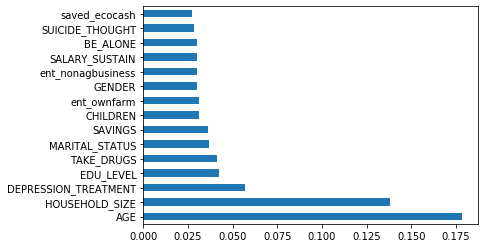

In [19]:
columns = ['GENDER','TIRED', 'AGE', 'SUICIDE_THOUGHT','TAKE_DRUGS','LOST_WEIGHT','TROUBLE _SLEEPING', 'EDU_LEVEL', 
           'FAILURE_DECISIONS', 'BE_ALONE','FAILURE_FEELING', 'CHILDREN', 'HOUSEHOLD_SIZE', 'MARITAL_STATUS',
           'ENJOY_JOB','NO_CARE', 'DEPRESSION_TREATMENT', 'DEBT','SAVINGS','FAMILY_DEPRESSED', 'SALARY_SUSTAIN','BORROW_MONEY',
           'saved_ecocash', 'received_ecocash', 'ent_wagelabor','ent_ownfarm','ent_business','ent_nonagbusiness','ent_employees']
all_X = train_data[columns]
all_y = train_data['DEPRESSED']

from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(all_X,all_y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=all_X.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

In [20]:
corr_matrix = train_data.corr()
corr_matrix["DEPRESSED"].sort_values(ascending=False)

DEPRESSED               1.000000
DEPRESSION_TREATMENT    0.101860
AGE                     0.094835
HOUSEHOLD_SIZE          0.064755
MARITAL_STATUS          0.064652
ent_nonagbusiness       0.061168
GENDER                  0.057433
CHILDREN                0.053079
TAKE_DRUGS              0.048038
saved_ecocash           0.044482
ent_business            0.040246
SALARY_SUSTAIN          0.034572
ent_employees           0.023232
FAMILY_DEPRESSED        0.003517
received_ecocash       -0.012307
ent_wagelabor          -0.016520
SUICIDE_THOUGHT        -0.018779
BORROW_MONEY           -0.022874
ent_ownfarm            -0.041437
DEBT                   -0.043064
EAT_MORE               -0.043512
LOST_WEIGHT            -0.046652
EDU_LEVEL              -0.051598
TROUBLE _SLEEPING      -0.059734
BE_ALONE               -0.072863
FAILURE_FEELING        -0.080315
 2_WEEK_SAD            -0.085423
LOST_APPETITE          -0.086136
FAILURE_DECISIONS      -0.088941
SAVINGS                -0.092014
NO_CARE   

# Splitting up the Training Data

Splitting the data we are seperating the Features(X) from the labels(y).
X_all: all features except the value we want to predict(Depressed).
Y_all: only the value we want to predict
    In our case we are training  80% of the data, then testing against the other 20%.
    
    we will use kfold pattern to validate the effectiveness of a trained algorithm

In [21]:
from sklearn.model_selection import train_test_split

columns = ['GENDER','TIRED', 'AGE', 'SUICIDE_THOUGHT','TAKE_DRUGS','LOST_WEIGHT','TROUBLE _SLEEPING', 'EDU_LEVEL', 
            'FAILURE_DECISIONS', 'BE_ALONE','FAILURE_FEELING', 'CHILDREN', 'HOUSEHOLD_SIZE', 'MARITAL_STATUS',
            'ENJOY_JOB','NO_CARE', 'DEPRESSION_TREATMENT', 'DEBT','SAVINGS','FAMILY_DEPRESSED', 'SALARY_SUSTAIN','BORROW_MONEY',
            'saved_ecocash', 'received_ecocash', 'ent_wagelabor','ent_ownfarm','ent_business','ent_nonagbusiness','ent_employees']


all_X = train_data[columns]
all_y = train_data['DEPRESSED']

train_X, test_X, train_y, test_y = train_test_split(
    all_X, all_y, test_size=0.3,random_state=0)
train_X.shape

(539, 29)

# Fitting an Algorithm

In [22]:
#import classifier algorithm here
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# create models
rf_model = RandomForestClassifier(n_estimators=100,bootstrap=True, max_features=15)
et_model = ExtraTreesClassifier()
xgb_cl = xgb.XGBClassifier(n_estimators=100,learning_rate=0.5,max_delta_step=5)


#fitting the models
rf_model.fit(train_X, train_y)
et_model.fit(train_X, train_y)
xgb_cl.fit(train_X, train_y)

##Prediction

# Actual class predictions
predictions = rf_model.predict(test_X)
predictions2 = et_model.predict(test_X)
predictions3 = xgb_cl.predict(test_X)
accuracy_score(test_y, predictions)

print(" Random Forest classifier: ",accuracy_score(test_y, predictions))
print(" Extra Tree classifier: ", accuracy_score(test_y, predictions2))
print(" XGB classifier: ", accuracy_score(test_y, predictions3))


 Random Forest classifier:  0.8577586206896551
 Extra Tree classifier:  0.8318965517241379
 XGB classifier:  0.8232758620689655


In [23]:
from sklearn import metrics
print(metrics.classification_report(predictions, test_y))

              precision    recall  f1-score   support

           0       0.98      0.87      0.92       225
           1       0.12      0.57      0.20         7

    accuracy                           0.86       232
   macro avg       0.55      0.72      0.56       232
weighted avg       0.96      0.86      0.90       232



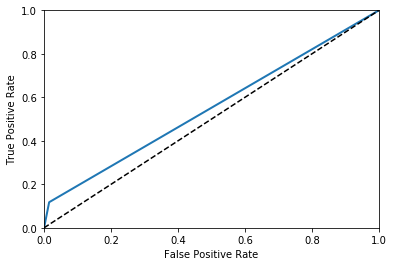

In [24]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_y,predictions)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
plot_roc_curve(fpr, tpr)
plt.show()

In [25]:
from sklearn.metrics import roc_auc_score
roc_auc_score(test_y,predictions)

0.5512477718360071

In [26]:
from sklearn.metrics import r2_score
print("R2 score:{}".format(r2_score(test_y, predictions)))

R2 score:-0.13725490196078427


# Saving the model

In [27]:
import pickle
pickle.dump(xgb_cl, open('models/xgb_cl.pkl','wb'))

In [28]:

# model=pickle.load(open('models/xgb_cl.pkl','rb'))
# print(model.predict(['yes']))